In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
boston_data = pd.read_csv("HousingData.csv")


In [3]:
boston_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
boston_data.isnull().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
boston_data.isna().sum().sum()



120

In [6]:
data = boston_data.dropna()
data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


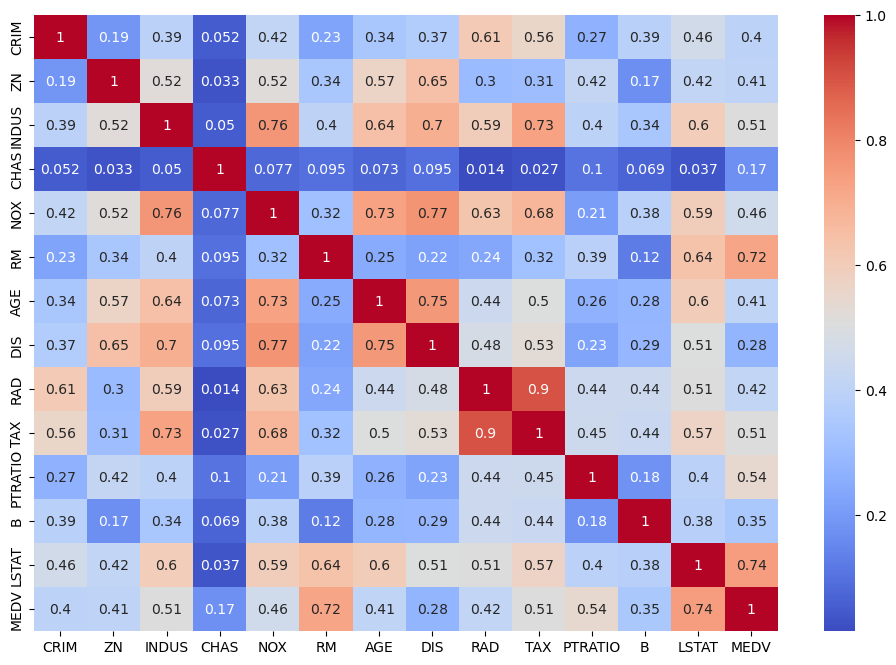

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr().abs(), annot= True, cmap= 'coolwarm');


In [8]:
train_df= data[['LSTAT', 'PTRATIO','RM', 'TAX','INDUS','MEDV']]
train_df


,LSTAT,PTRATIO,RM,TAX,INDUS,MEDV
0,4.98,15.3,6.575,296,2.31,24.0
1,9.14,17.8,6.421,242,7.07,21.6
2,4.03,17.8,7.185,242,7.07,34.7
3,2.94,18.7,6.998,222,2.18,33.4
5,5.21,18.7,6.430,222,2.18,28.7
...,...,...,...,...,...,...
499,15.10,19.2,5.569,391,9.69,17.5
500,14.33,19.2,6.027,391,9.69,16.8
502,9.08,21.0,6.120,273,11.93,20.6
503,5.64,21.0,6.976,273,11.93,23.9


In [10]:
x = train_df[['LSTAT', 'RM', 'TAX', 'INDUS']]
y = train_df['MEDV']


In [11]:
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)


In [13]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [14]:
y_pred = model.predict(x_test)


In [15]:
y_pred[:5]


array([16.096743  , 19.36549782, 35.9560968 , 20.79573226, 32.31662403])

In [16]:
y_test[:5]


140    14.0
358    22.7
98     43.8
485    21.2
3      33.4
Name: MEDV, dtype: float64

In [17]:
mse = mean_squared_error(y_test, y_pred)
mse


36.4005335677223

<AxesSubplot: xlabel='MEDV'>

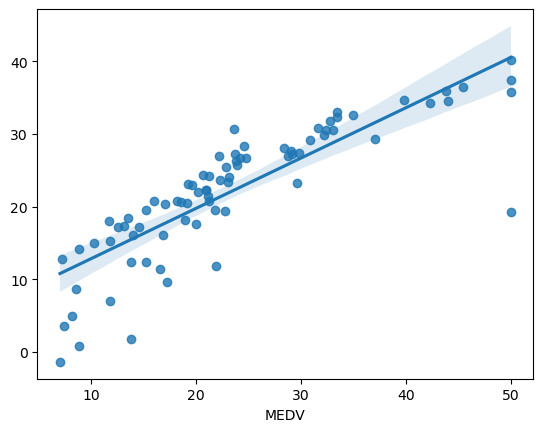

In [18]:
sns.regplot(x = y_test, y = y_pred, ci= 95)
